# Librairies

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
import contextily as cx

# Load data

In [2]:
df = gpd.read_file('raw/intenzita_dopravy_pentlogramy_-2087072355465349330.geojson')

(16.435375213623047, 16.786829005695107, 49.09557099992234, 49.32523387394962)

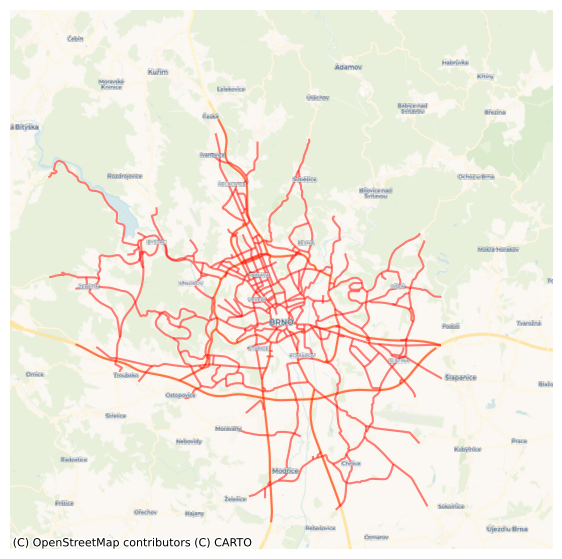

In [3]:
# Plot sensors
ax = df.plot(color = 'r', alpha = .5, figsize = (7,7))
# Add context in backround
cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('auto')
plt.axis('off')

In [4]:
df.columns

Index(['id', 'car_2010', 'truc_2010', 'car_2011', 'truc_2011', 'car_2012',
       'truc_2012', 'car_2013', 'truc_2013', 'car_2014', 'truc_2014',
       'car_2015', 'truc_2015', 'car_2016', 'truc_2016', 'car_2017',
       'truc_2017', 'car_2018', 'truc_2018', 'car_2019', 'truc_2019',
       'car_2020', 'truc_2020', 'car_2021', 'truc_2021', 'car_2022',
       'truc_2022', 'car_2023', 'truc_2023', 'datum_exportu', 'ObjectId',
       'GlobalID', 'geometry'],
      dtype='object')

In [5]:
# Remove earlier years
df = df.drop(
    ['car_2010', 'truc_2010', 'car_2011', 'truc_2011', 'car_2012',
       'truc_2012', 'car_2013', 'truc_2013', 'car_2014', 'truc_2014',
       'car_2015', 'truc_2015',], axis = 1
)

In [6]:
# The number is in thousands
for c in df.columns :
    if 'car' in c :
        df[c] = 1e3 * df[c]

# Map matching with OSM

In [7]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [8]:
df = lines_matching(df)

Main graph loaded
Node 87309058 not reachable from 39988105
Node 127220966 not reachable from 39988105
Node 87309058 not reachable from 39988105
Node 127220966 not reachable from 39988105
Node 87309058 not reachable from 61545514
Node 127220966 not reachable from 61545514
Node 87309058 not reachable from 39988105
Node 127220966 not reachable from 39988105
Node 639668307 not reachable from 1974180694
Node 137728165 not reachable from 1974180694
Node 2068225313 not reachable from 1974180694
Node 68717569 not reachable from 1974180694
Node 2103812584 not reachable from 1974180694
Node 2103812584 not reachable from 1974180694
Node 161126104 not reachable from 1974180694
Node 137728165 not reachable from 1974180694
Node 162699537 not reachable from 1974180694
Node 68717569 not reachable from 1974180694
Node 208794906 not reachable from 1974180694
Node 2141228076 not reachable from 1974180694
Node 639668307 not reachable from 1974180694
Node 639668307 not reachable from 2118273596
Node 13772

# Final save

In [9]:
from validate_dataset import validate_dataset

In [10]:
for year in range(2016, 2024):
    sub = df[[
        f'car_{year}',
        f'truc_{year}',
        'osm_name', 'osm_type', 'osm_lanes',  'osm_oneway', 'osm_maxspeed', 'osmid', 'geometry'
    ]].rename(
        columns = {
          f'car_{year}':'AADT',
        f'truc_{year}':'TR_pct_AADT',  
        }
    )
    
    sub = validate_dataset(sub)
    
    sub.to_file(
        f'treated/Brno_AADT_{year}.geojson'
    )

Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 2
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 1
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0
Number of NaN values for AADT: 0
Number o